categorias em pandas são uma maneira de representar dados categóricos, saõa variáveis que assumem um número finito e bem definido de valores possíveis. Elas são úteis quando você está lidando com dados que podem ser classificados em um conjunto específico de categorias, como por exemplo:

Cores: vermelho, verde, azul
Gênero: masculino, feminino
Tipos de produtos: eletrônicos, roupas, alimentos
Grau de educação: ensino fundamental, ensino médio, graduação, pós-graduação
Em vez de tratar esses valores como strings normais ou números, você pode usar categorias para representá-los de forma mais eficiente. Quando você converte uma coluna de um DataFrame para o tipo de dado categoria em pandas, o pandas mantém um índice de todas as categorias exclusivas presentes naquela coluna. Os valores reais da coluna são então representados por esses índices, o que economiza memória.

Além disso, as categorias podem ter uma ordem específica. Por exemplo, na coluna de grau de educação mencionada acima, você pode querer que "pós-graduação" seja considerada uma categoria mais alta do que "graduação". Isso pode ser útil em operações como ordenação.

In [1]:
# essa nossa tabela é uma base de dados de gorjetas que um garçom recebeu

import pandas as pd

df = pd.read_csv('tips.csv')

df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.info() # conhecendo a base no geral 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.describe(exclude="number")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [5]:
for coluna in df.select_dtypes(include="object"): 
    print(f"{coluna}: {df[coluna].unique()}")
# para olhar os valores unicos de uma unica coluna

sex: ['Female' 'Male']
smoker: ['No' 'Yes']
day: ['Sun' 'Sat' 'Thur' 'Fri']
time: ['Dinner' 'Lunch']


<Axes: >

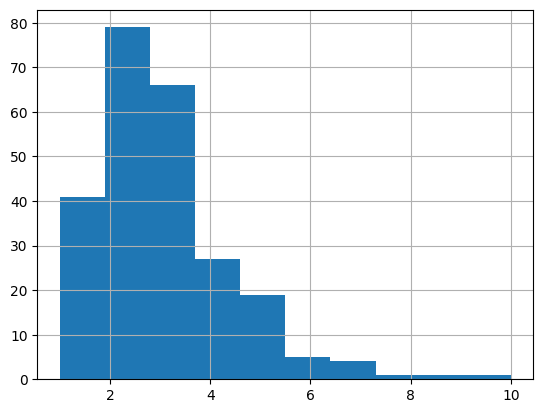

In [6]:
df["tip"].hist()

In [7]:
df["tip"].value_counts(bins=10)

(1.9, 2.8]     79
(2.8, 3.7]     66
(0.99, 1.9]    41
(3.7, 4.6]     27
(4.6, 5.5]     19
(5.5, 6.4]      5
(6.4, 7.3]      4
(7.3, 8.2]      1
(8.2, 9.1]      1
(9.1, 10.0]     1
Name: count, dtype: int64

In [8]:
df["tip"].value_counts(bins=10).sort_index()
# A GENTE colocou em uma ordem crescente os 'intervalos'

(0.99, 1.9]    41
(1.9, 2.8]     79
(2.8, 3.7]     66
(3.7, 4.6]     27
(4.6, 5.5]     19
(5.5, 6.4]      5
(6.4, 7.3]      4
(7.3, 8.2]      1
(8.2, 9.1]      1
(9.1, 10.0]     1
Name: count, dtype: int64

#### Pandas cut

In [9]:
faixas = [0, 2, 5, float("inf")] # de 0 a 2 -> baixo... acima de 5 alto
categorias = ["baixo", "medio", "alto"]

# vou pegar essa coluna e categorizar = pegando a coluna de referencia "tip"
df["categorias_tip"] = pd.cut(df["tip"], bins=faixas, labels=categorias)


# Perceba que eu criei CATEGORIAS conforme os valores que eu passei ali em cima na nova categoria
df.head()

,total_bill,tip,sex,smoker,day,time,size,categorias_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [10]:
df["categorias_tip"].value_counts()


categorias_tip
medio    148
baixo     78
alto      18
Name: count, dtype: int64

In [11]:
df["categorias_tip"].value_counts(normalize=True)

categorias_tip
medio    0.606557
baixo    0.319672
alto     0.073770
Name: proportion, dtype: float64

- analisando os valores gerados

In [12]:
# olhando mais de perto- agora temos UMA NOVA COLUNA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    object  
 3   smoker          244 non-null    object  
 4   day             244 non-null    object  
 5   time            244 non-null    object  
 6   size            244 non-null    int64   
 7   categorias_tip  244 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 13.8+ KB


In [13]:
df["categorias_tip"].sort_values()   # look Valores de forma ordenada (sort_values)

0      baixo
148    baixo
147    baixo
146    baixo
145    baixo
       ...  
212     alto
172     alto
44      alto
214     alto
88      alto
Name: categorias_tip, Length: 244, dtype: category
Categories (3, object): ['baixo' < 'medio' < 'alto']

In [14]:
# podemos acessar as categorias '.cat' pra gente ver os nomes das categorias 
df["categorias_tip"].cat.categories

Index(['baixo', 'medio', 'alto'], dtype='object')

In [15]:
# acessar os valores unicos dessa coluna
df["categorias_tip"].unique()

['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']

In [16]:
# aqui eu to perguntando se essas ' categorias ' são ordenadas. 
# a gente ja viu que ele ordenou automaticamente ali em cima
df["categorias_tip"].cat.ordered

True

- pandas associa numeros internamente na sua memoria, 
ele ta associando baixo ao numero 0, 1 é menor que 2 logo é medio. 
2 é o maior, então ele associou como alto

In [17]:
# dando uma olhadinha nos number
df["categorias_tip"].cat.codes


0      0
1      0
2      1
3      1
4      1
      ..
239    2
240    0
241    0
242    0
243    1
Length: 244, dtype: int8

#### Criando colunas em outras columns :)

In [18]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'categorias_tip'],
      dtype='object')

In [19]:

colunas_categorizadas = ["sex", "smoker", "day", "time"]

df_categorizado = df.copy() # esse DF é uma copia do qua ja temos, pra não mudar

# para cada uma dessas colunas eu vou colocar ela propria, mas com o tipo dela... o tipo categorico
for coluna in colunas_categorizadas:
    df_categorizado[coluna] = df_categorizado[coluna].astype("category")

df_categorizado.head(6)

,total_bill,tip,sex,smoker,day,time,size,categorias_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio
5,25.29,4.71,Male,No,Sun,Dinner,4,medio


In [20]:
# na tabela anterior não muou muita coisa, mas repare nas infos agora --->
df_categorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    category
 3   smoker          244 non-null    category
 4   day             244 non-null    category
 5   time            244 non-null    category
 6   size            244 non-null    int64   
 7   categorias_tip  244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.7 KB


In [21]:
for coluna in df_categorizado.select_dtypes(include="category"):  # cada coluna desse nosso df selecionando as que possuem category
    print(f"{coluna}: {df_categorizado[coluna].unique()}")
    print(f"{coluna}.cat.categories: {df_categorizado[coluna].cat.categories}")
    print(f"{coluna}.cat.categories:{df_categorizado[coluna].cat.ordered}") # coluna dia, podemos ordena-las
    print()


sex: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
sex.cat.categories: Index(['Female', 'Male'], dtype='object')
sex.cat.categories:False

smoker: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
smoker.cat.categories: Index(['No', 'Yes'], dtype='object')
smoker.cat.categories:False

day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']
day.cat.categories: Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')
day.cat.categories:False

time: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
time.cat.categories: Index(['Dinner', 'Lunch'], dtype='object')
time.cat.categories:False

categorias_tip: ['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']
categorias_tip.cat.categories: Index(['baixo', 'medio', 'alto'], dtype='object')
categorias_tip.cat.categories:True



## categorias Ordenadas
- .cat.set_categories

In [22]:
df_categorizado["day"].value_counts() 
# O value_counts deixa em uma ordem decrescente pra gente

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [23]:
df_categorizado["day"].value_counts().sort_index()
# agora usando o index, ele coloca em ordem alfabetica

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: count, dtype: int64

<Axes: xlabel='day'>

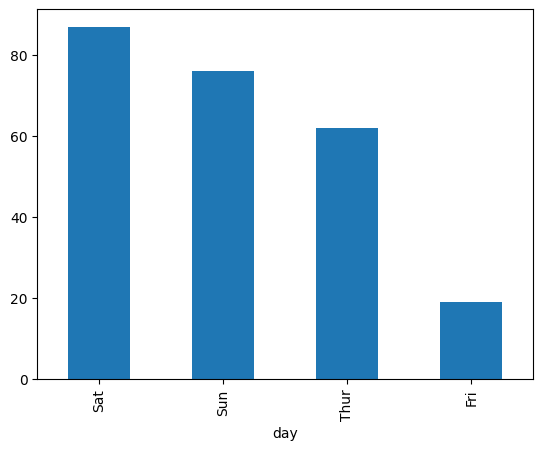

In [25]:
df_categorizado["day"].value_counts().plot(kind="bar")

In [26]:
dias_semana = ["Thur", "Fri", "Sat", "Sun"]

df_categorizado["day"] = df_categorizado["day"].cat.set_categories(dias_semana, ordered=True)
# to pegando a coluna de dia dentro do df = to dizendo que essa coluna de dia receba ela propria,
# mas dessa vez ordenada

df_categorizado.head(4) # verificando o df

,total_bill,tip,sex,smoker,day,time,size,categorias_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio


In [28]:
df_categorizado.info() # apenas verificando se continuou como categorica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    category
 3   smoker          244 non-null    category
 4   day             244 non-null    category
 5   time            244 non-null    category
 6   size            244 non-null    int64   
 7   categorias_tip  244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.7 KB


In [29]:
df_categorizado["day"].value_counts().sort_index()

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: count, dtype: int64

- agora os dias seguem uma ordem 

<Axes: xlabel='day'>

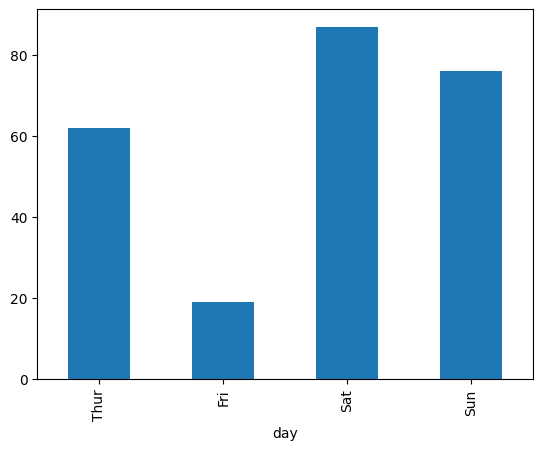

In [31]:
df_categorizado["day"].value_counts().sort_index().plot(kind="bar")

**Assim deixa o grafico mais intuitivo, com os dias em ordem... na sexta pode ter acontecido alguma coisa**